In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from pylab import rcParams
from IPython.display import display
import math

import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)
pd.set_option('display.max_columns', 130)

# pd.set_option('future.no_silent_downcasting', False)


In [23]:
# open and read excel file
x_vars = pd.read_excel("../input data/Темпа-Осадки-Поголовье_new.xlsx")
x_vars.head(5)

,Unnamed: 0,Unnamed: 1,1,2,3,4,5,6,7,8,...,3.9,4.9,5.9,6.9,7.9,8.9,9.9,10.9,11.9,12.9
0,Температура,Акмолинская область,-12.490323,-10.192857,-5.870968,4.490000,14.574194,20.763333,19.180645,16.529032,...,-4.809677,8.026667,10.696774,21.043333,20.270968,17.338710,11.300000,3.832258,-4.343333,-7.638710
1,Температура,Актюбинская область,-13.483871,-11.821429,-5.990323,6.356667,15.609677,25.126667,23.167742,20.732258,...,-4.800000,13.513333,13.083871,22.893333,22.912903,20.206452,14.083333,6.667742,-1.520000,-6.419355
2,Температура,Алматинская область,-5.432258,-1.100000,2.909677,12.126667,17.180645,20.980000,25.564516,22.100000,...,2.812903,11.100000,16.348387,22.023333,23.158065,23.487097,13.726667,9.222581,2.256667,-6.796774
3,Температура,Атырауская область,-6.222581,-6.300000,0.380645,10.856667,19.506452,28.906667,27.177419,25.241935,...,2.522581,17.776667,17.341935,27.453333,28.264516,25.774194,19.956667,10.648387,3.096667,-2.612903
4,Температура,Западно-Казахстанская область,-11.845161,-8.928571,-4.406452,7.470000,17.100000,25.283333,22.690323,20.348387,...,-4.632258,14.926667,13.332258,23.853333,24.132258,21.151613,15.246667,8.261290,0.423333,-5.496774


In [24]:
x_vars = x_vars.rename(columns={x_vars.columns[0]: "Показатель", x_vars.columns[1]: "Регион"})
x_vars.head(5)

,Показатель,Регион,1,2,3,4,5,6,7,8,...,3.9,4.9,5.9,6.9,7.9,8.9,9.9,10.9,11.9,12.9
0,Температура,Акмолинская область,-12.490323,-10.192857,-5.870968,4.490000,14.574194,20.763333,19.180645,16.529032,...,-4.809677,8.026667,10.696774,21.043333,20.270968,17.338710,11.300000,3.832258,-4.343333,-7.638710
1,Температура,Актюбинская область,-13.483871,-11.821429,-5.990323,6.356667,15.609677,25.126667,23.167742,20.732258,...,-4.800000,13.513333,13.083871,22.893333,22.912903,20.206452,14.083333,6.667742,-1.520000,-6.419355
2,Температура,Алматинская область,-5.432258,-1.100000,2.909677,12.126667,17.180645,20.980000,25.564516,22.100000,...,2.812903,11.100000,16.348387,22.023333,23.158065,23.487097,13.726667,9.222581,2.256667,-6.796774
3,Температура,Атырауская область,-6.222581,-6.300000,0.380645,10.856667,19.506452,28.906667,27.177419,25.241935,...,2.522581,17.776667,17.341935,27.453333,28.264516,25.774194,19.956667,10.648387,3.096667,-2.612903
4,Температура,Западно-Казахстанская область,-11.845161,-8.928571,-4.406452,7.470000,17.100000,25.283333,22.690323,20.348387,...,-4.632258,14.926667,13.332258,23.853333,24.132258,21.151613,15.246667,8.261290,0.423333,-5.496774


In [25]:
# Flatten to "YYYY-MM" strings

# Generate full list of months
years = list(range(2015, 2025))  # 2015 to 2024
months = list(range(1, 13))      # 1 to 12

periods = [f"{year}-{str(month).zfill(2)}" for year in years for month in months]
periods

['2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '20

In [26]:
# add periods formatted as "YYYY-MM" as columns 
x_vars.columns = list(x_vars.columns[:2]) + periods
x_vars

,Показатель,Регион,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
0,Температура,Акмолинская область,-12.490323,-10.192857,-5.870968,4.490000,14.574194,20.763333,19.180645,16.529032,...,-4.809677,8.026667,10.696774,21.043333,20.270968,17.338710,11.300000,3.832258,-4.343333,-7.638710
1,Температура,Актюбинская область,-13.483871,-11.821429,-5.990323,6.356667,15.609677,25.126667,23.167742,20.732258,...,-4.800000,13.513333,13.083871,22.893333,22.912903,20.206452,14.083333,6.667742,-1.520000,-6.419355
2,Температура,Алматинская область,-5.432258,-1.100000,2.909677,12.126667,17.180645,20.980000,25.564516,22.100000,...,2.812903,11.100000,16.348387,22.023333,23.158065,23.487097,13.726667,9.222581,2.256667,-6.796774
3,Температура,Атырауская область,-6.222581,-6.300000,0.380645,10.856667,19.506452,28.906667,27.177419,25.241935,...,2.522581,17.776667,17.341935,27.453333,28.264516,25.774194,19.956667,10.648387,3.096667,-2.612903
4,Температура,Западно-Казахстанская область,-11.845161,-8.928571,-4.406452,7.470000,17.100000,25.283333,22.690323,20.348387,...,-4.632258,14.926667,13.332258,23.853333,24.132258,21.151613,15.246667,8.261290,0.423333,-5.496774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Поголовье: верблюды,Область Жетысу,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1819.000000,1834.000000,1841.000000,1861.000000,747.000000,685.000000,685.000000,685.000000,685.000000,685.000000
168,Поголовье: верблюды,Область Улытау,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,710.000000,711.000000,711.000000,747.000000,502.000000,510.000000,515.000000,515.000000,513.000000,509.000000
169,Поголовье: верблюды,Область Абай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,476.000000,444.000000,465.000000,495.000000,NaN,NaN,NaN,NaN,NaN,NaN
170,Поголовье: верблюды,ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ,20408.000000,21618.000000,23462.000000,24485.000000,24982.000000,25244.000000,24192.000000,23703.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# remove ЮКО
x_vars = x_vars[x_vars["Регион"] != "ЮЖНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ"]

# check region names
x_vars['Регион'].unique()

array(['Акмолинская область', 'Актюбинская область',
       'Алматинская область', 'Атырауская область',
       'Западно-Казахстанская область', 'Жамбылская область',
       'Карагандинская область', 'Костанайская область',
       'Кызылординская область', 'Мангистауская область',
       'Павлодарская область', 'Северо-Казахстанская область',
       'Восточно-Казахстанская область', 'г.Астана', 'г.Aлматы',
       'г.Шымкент', 'Туркестанская область', 'Область Жетысу',
       'Область Улытау', 'Область Абай', 'РЕСПУБЛИКА КАЗАХСТАН'],
      dtype=object)

In [28]:
region_mapping = {
    "Акмолинская область": "АКМОЛИНСКАЯ ОБЛАСТЬ",
    "Актюбинская область": "АКТЮБИНСКАЯ ОБЛАСТЬ",
    "Алматинская область": "АЛМАТИНСКАЯ ОБЛАСТЬ",
    "Атырауская область": "АТЫРАУСКАЯ ОБЛАСТЬ",
    "Западно-Казахстанская область": "ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "Жамбылская область": "ЖАМБЫЛСКАЯ ОБЛАСТЬ",
    "Карагандинская область": "КАРАГАНДИНСКАЯ ОБЛАСТЬ",
    "Костанайская область": "КОСТАНАЙСКАЯ ОБЛАСТЬ",
    "Кызылординская область": "КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ",
    "Мангистауская область": "МАНГИСТАУСКАЯ ОБЛАСТЬ",
    "Павлодарская область": "ПАВЛОДАРСКАЯ ОБЛАСТЬ",
    "Северо-Казахстанская область": "СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "Восточно-Казахстанская область": "ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ",
    "г.Астана": "ГАСТАНА",
    "г.Aлматы": "ГАЛМАТЫ",
    "г.Шымкент": "ГШЫМКЕНТ",
    "Туркестанская область": "ТУРКЕСТАНСКАЯ ОБЛАСТЬ",
    "Область Жетысу": "ОБЛАСТЬ ЖЕТІСУ",
    "Область Улытау": "ОБЛАСТЬ ҰЛЫТАУ",
    "Область Абай": "ОБЛАСТЬ АБАЙ"           # already fine
}

x_vars["Регион"] = x_vars["Регион"].replace(region_mapping)
x_vars['Регион'].unique()

C:\Users\Acer\AppData\Local\Temp\ipykernel_17464\2773735274.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_vars["Регион"] = x_vars["Регион"].replace(region_mapping)


array(['АКМОЛИНСКАЯ ОБЛАСТЬ', 'АКТЮБИНСКАЯ ОБЛАСТЬ',
       'АЛМАТИНСКАЯ ОБЛАСТЬ', 'АТЫРАУСКАЯ ОБЛАСТЬ',
       'ЗАПАДНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ЖАМБЫЛСКАЯ ОБЛАСТЬ',
       'КАРАГАНДИНСКАЯ ОБЛАСТЬ', 'КОСТАНАЙСКАЯ ОБЛАСТЬ',
       'КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ', 'МАНГИСТАУСКАЯ ОБЛАСТЬ',
       'ПАВЛОДАРСКАЯ ОБЛАСТЬ', 'СЕВЕРО-КАЗАХСТАНСКАЯ ОБЛАСТЬ',
       'ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ', 'ГАСТАНА', 'ГАЛМАТЫ', 'ГШЫМКЕНТ',
       'ТУРКЕСТАНСКАЯ ОБЛАСТЬ', 'ОБЛАСТЬ ЖЕТІСУ', 'ОБЛАСТЬ ҰЛЫТАУ',
       'ОБЛАСТЬ АБАЙ', 'РЕСПУБЛИКА КАЗАХСТАН'], dtype=object)

In [29]:
indicators = x_vars['Показатель'].unique()
indicators

array(['Температура', 'Осадки', 'Поголовье: КРС', 'Поголовье: лошади',
       'Поголовье: овцы и козы', 'Поголовье: свиньи',
       'Поголовье: птица домашняя', 'Поголовье: верблюды'], dtype=object)

#### Data preparation

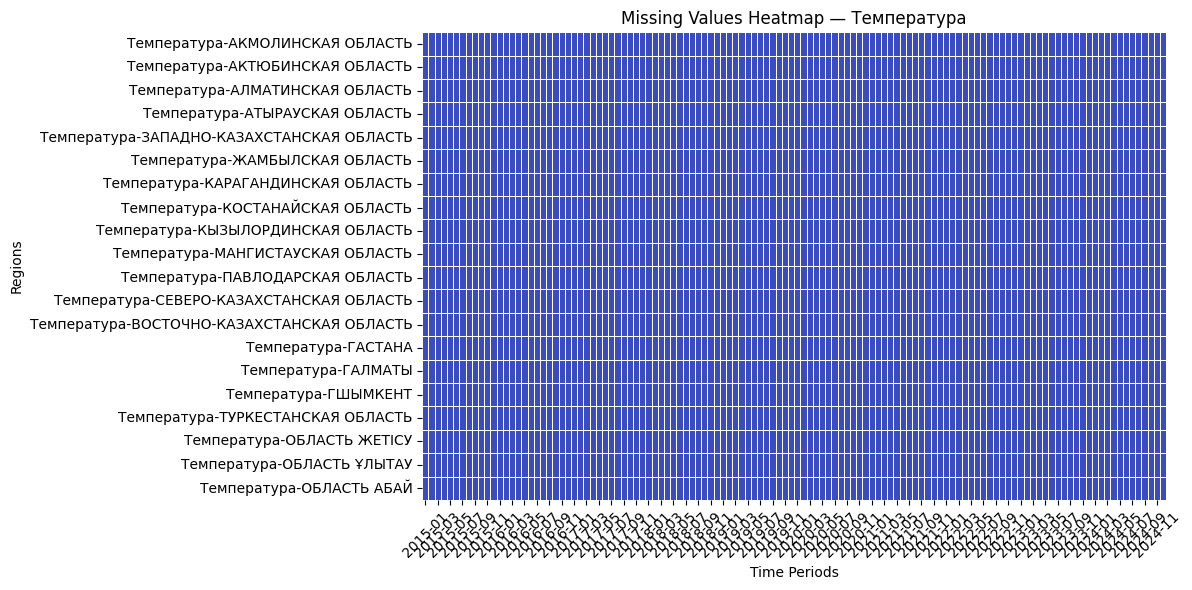

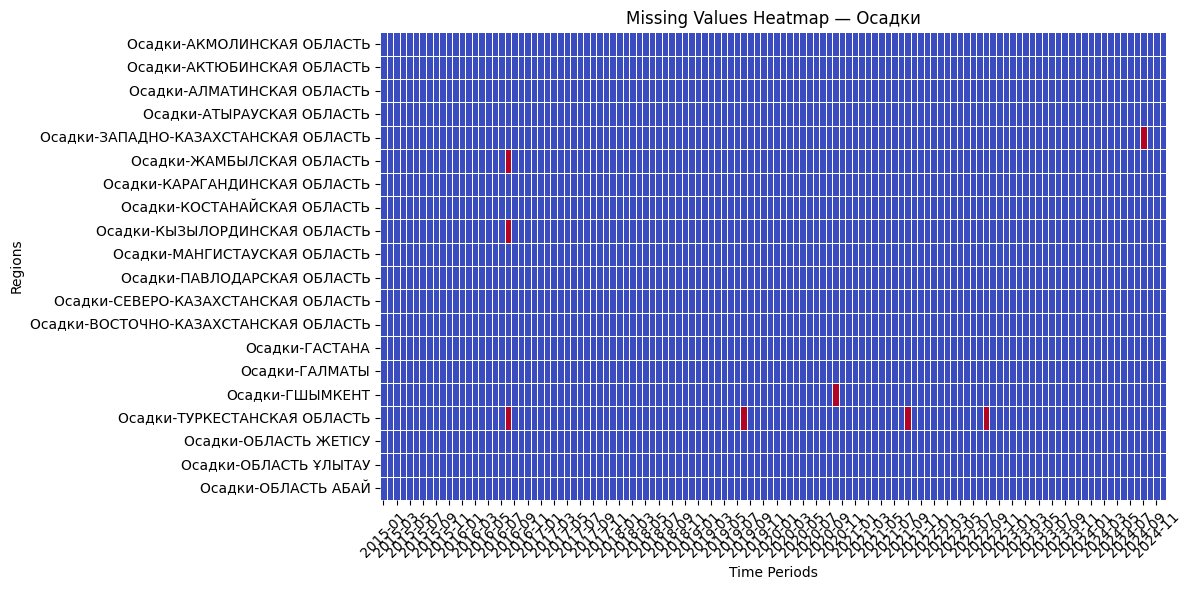

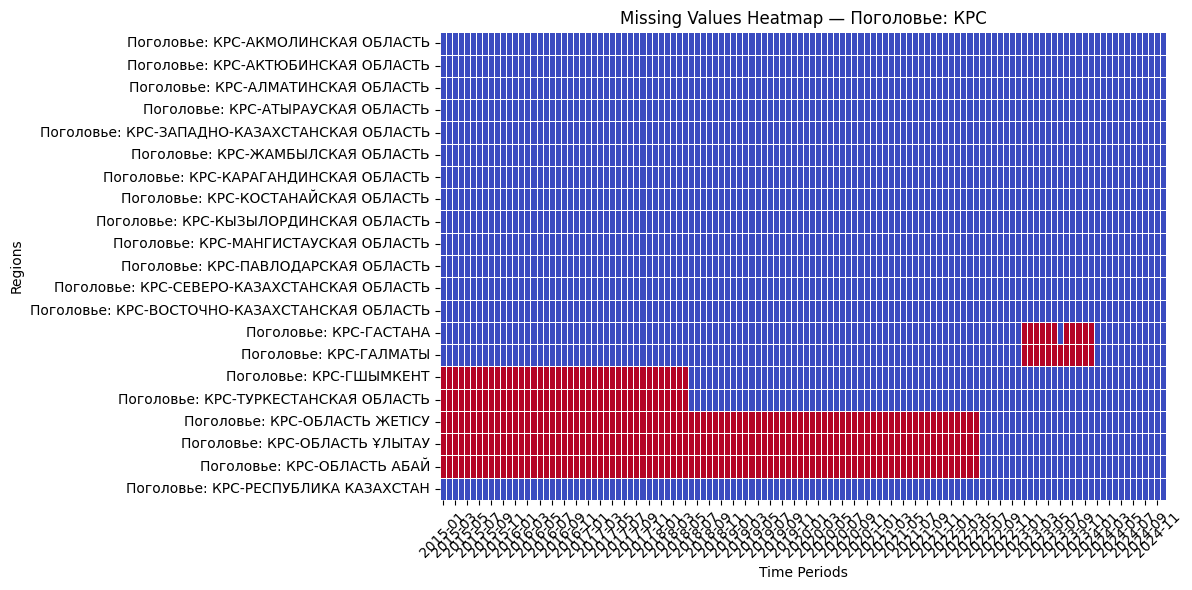

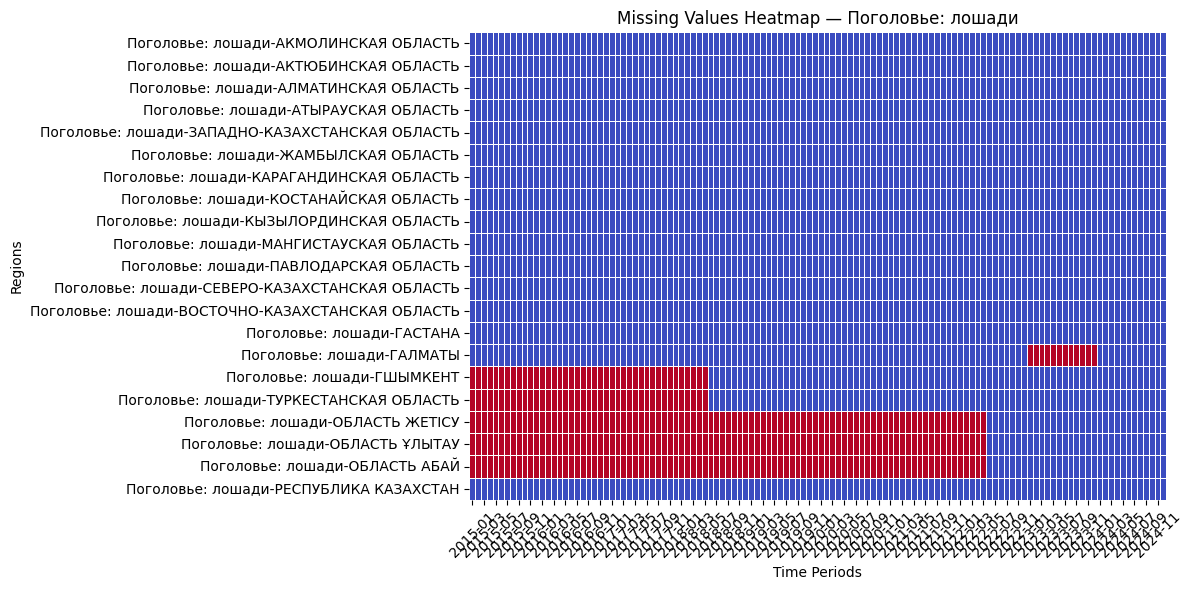

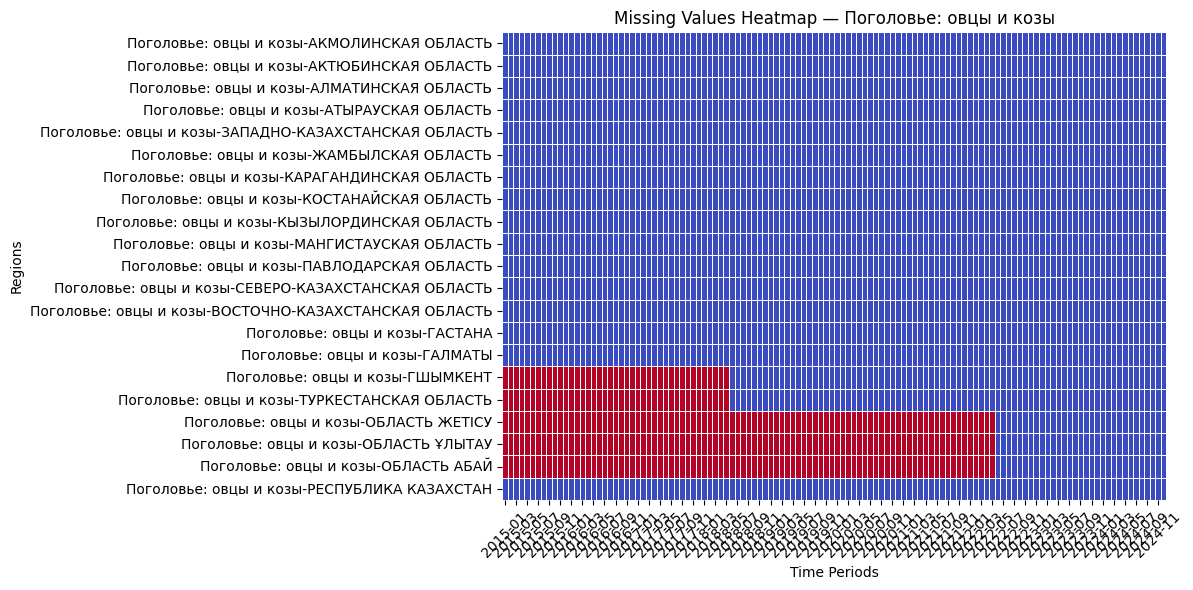

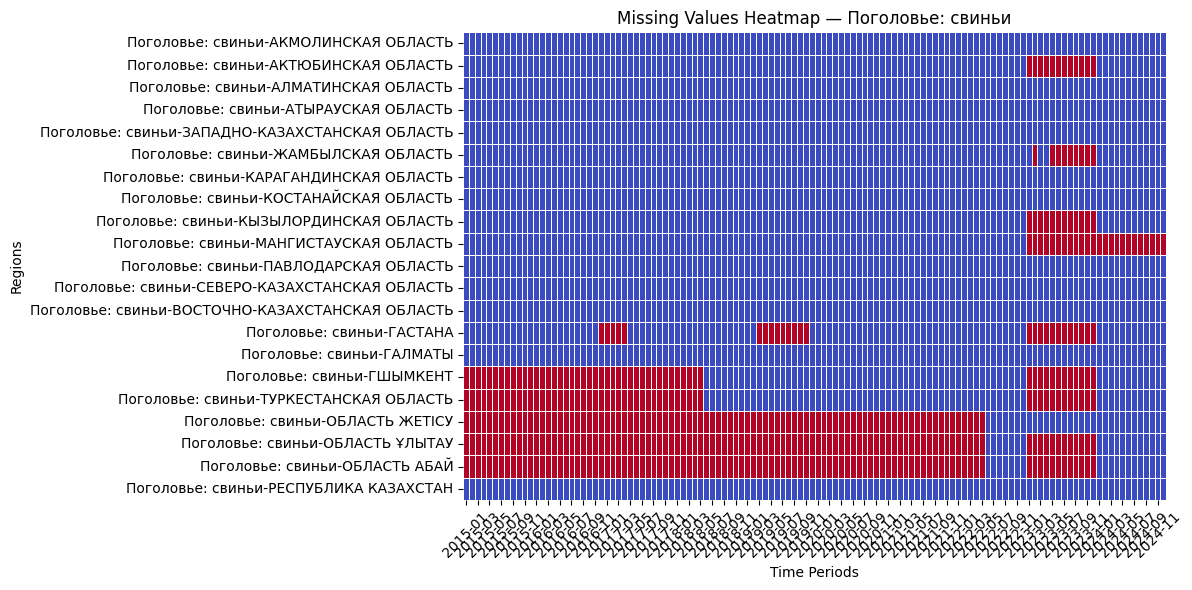

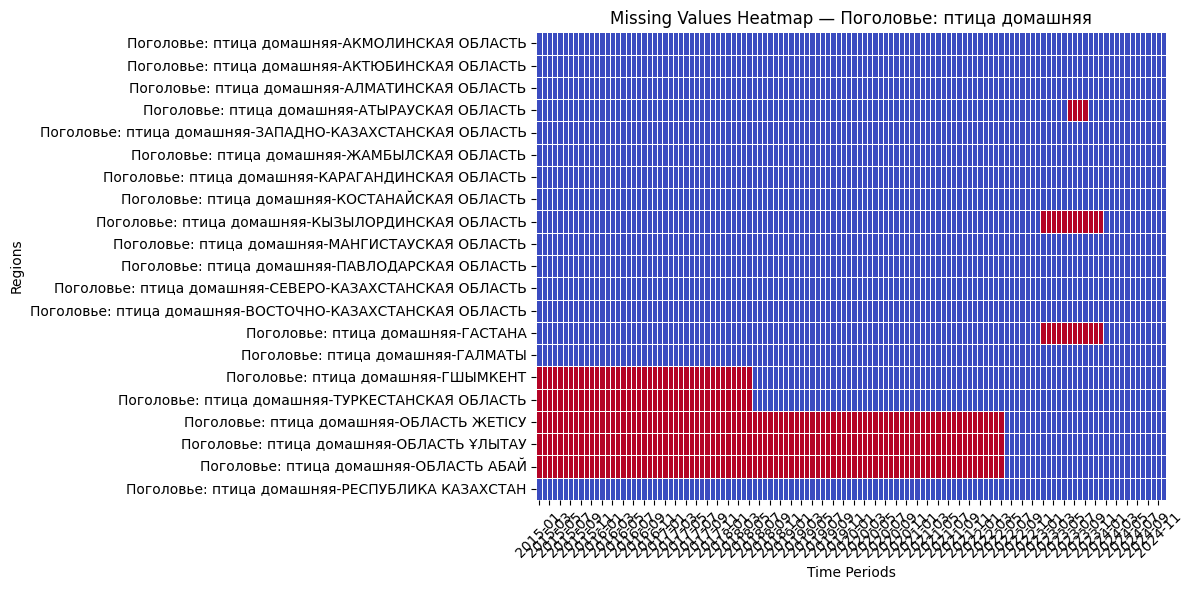

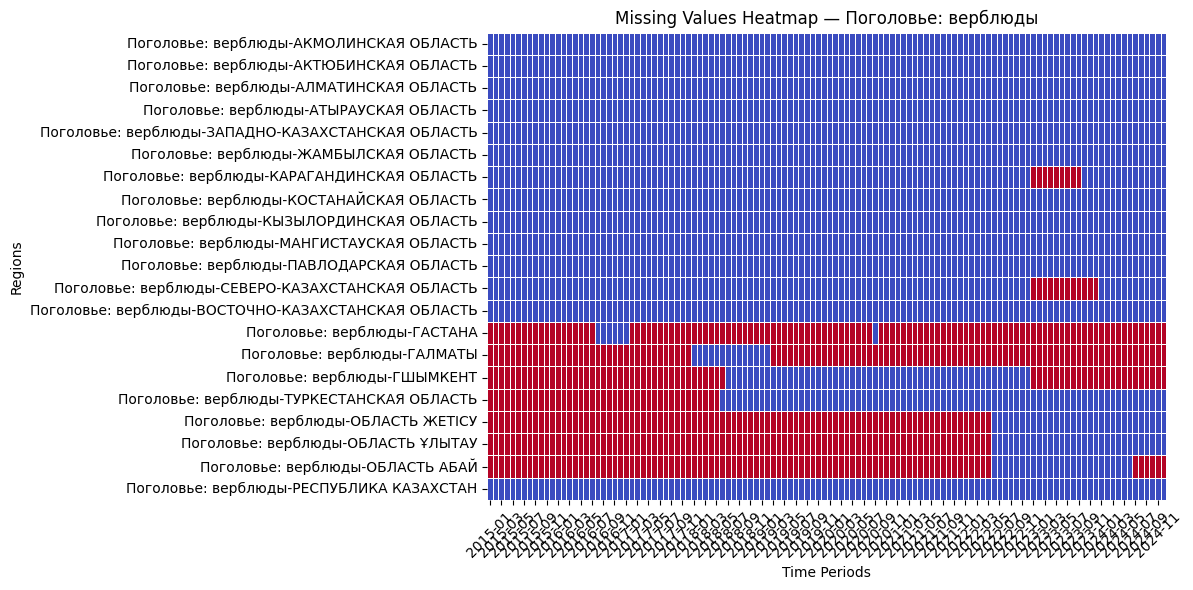

In [30]:
for indicator in indicators:
    # Filter and convert to numeric
    df_indicator = x_vars[x_vars["Показатель"] == indicator].set_index(["Показатель", "Регион"])
    df_indicator_numeric = df_indicator.apply(pd.to_numeric, errors="coerce")
    
    # Missing heatmap mask
    missing_heatmap = df_indicator_numeric.isna()
    
    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(missing_heatmap, cmap="coolwarm", cbar=False, linewidths=0.5)
    plt.title(f"Missing Values Heatmap — {indicator}")
    plt.xlabel("Time Periods")
    plt.ylabel("Regions")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [31]:
# Step 1: Filter only Осадки data
df_osadki = x_vars[x_vars["Показатель"] == "Осадки"].set_index("Регион")

# Step 2: Loop through each missing cell (excluding those already known)
for region in df_osadki.index:
    for col in df_osadki.columns[1:]:  # skip identifier columns if needed
        val = df_osadki.loc[region, col]
        
        # If it's missing and not part of excluded periods
        if pd.isna(val):
            # Extract month string (e.g. "01" from "2015-01")
            month = col[-2:]
            
            # Get all columns that match that month but not the same year
            month_cols = [c for c in df_osadki.columns[2:] if c.endswith(f"-{month}") and c != col]
            
            # Calculate mean for that region over other years with same month
            month_values = df_osadki.loc[region, month_cols].dropna()
            if not month_values.empty:
                df_osadki.loc[region, col] = month_values.mean()
print(df_osadki.sample(10))
# 1. Reset index to match structure of x_vars
df_osadki_reset = df_osadki.reset_index()

# 2. Drop original Осадки rows from x_vars
x_vars = x_vars[x_vars["Показатель"] != "Осадки"]

# 3. Append the updated Осадки data back in
x_vars = pd.concat([x_vars, df_osadki_reset], ignore_index=True)


                               Показатель  2015-01  2015-02  2015-03  2015-04  \
Регион                                                                          
АЛМАТИНСКАЯ ОБЛАСТЬ                Осадки      8.9     21.3     48.6     61.5   
МАНГИСТАУСКАЯ ОБЛАСТЬ              Осадки     13.2      0.9      2.2     31.7   
АКМОЛИНСКАЯ ОБЛАСТЬ                Осадки      9.8      9.8      8.3      8.8   
ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛАСТЬ     Осадки     29.4     33.4     41.2     50.6   
АКТЮБИНСКАЯ ОБЛАСТЬ                Осадки     33.6      8.2     15.4     26.1   
ОБЛАСТЬ ЖЕТІСУ                     Осадки     54.2     33.8     44.3     55.5   
ГАСТАНА                            Осадки     21.4      9.3     27.6     25.4   
КЫЗЫЛОРДИНСКАЯ ОБЛАСТЬ             Осадки     16.4      5.9     20.2     22.7   
ГШЫМКЕНТ                           Осадки    110.8     75.4     78.2     62.7   
ПАВЛОДАРСКАЯ ОБЛАСТЬ               Осадки     13.7      3.8     21.8      5.2   

                           

In [32]:
df_pogol_krs = x_vars[x_vars["Показатель"] == "Поголовье: КРС"].set_index("Регион")
print(df_pogol_krs.loc['ГАСТАНА'][-28:])
print(df_pogol_krs.loc['ГАЛМАТЫ'][-28:])

2022-09    236.0
2022-10    220.0
2022-11    221.0
2022-12    208.0
2023-01      NaN
2023-02      NaN
2023-03      NaN
2023-04      NaN
2023-05      NaN
2023-06      NaN
2023-07     22.0
2023-08      NaN
2023-09      NaN
2023-10      NaN
2023-11      NaN
2023-12      NaN
2024-01    238.0
2024-02    232.0
2024-03    221.0
2024-04    210.0
2024-05    202.0
2024-06    195.0
2024-07    156.0
2024-08    151.0
2024-09    146.0
2024-10    134.0
2024-11    126.0
2024-12    120.0
Name: ГАСТАНА, dtype: object
2022-09    2945.0
2022-10    2995.0
2022-11    2873.0
2022-12    2666.0
2023-01       NaN
2023-02       NaN
2023-03       NaN
2023-04       NaN
2023-05       NaN
2023-06       NaN
2023-07       NaN
2023-08       NaN
2023-09       NaN
2023-10       NaN
2023-11       NaN
2023-12       NaN
2024-01    2006.0
2024-02    1996.0
2024-03    2021.0
2024-04    2129.0
2024-05    2158.0
2024-06    2312.0
2024-07    2279.0
2024-08    2293.0
2024-09    2289.0
2024-10    2324.0
2024-11    2368.0
2024-12  

In [ ]:
# # Step 1: Filter only Поголовье: КРС data
# df_pogol_krs = x_vars[x_vars["Показатель"] == "Поголовье: КРС"].set_index("Регион")

# # Step 2: Loop through each missing cell (excluding those already known)
# for region in df_pogol_krs.index:
#     for col in df_pogol_krs.columns[1:]:  # skip identifier columns if needed
#         val = df_pogol_krs.loc[region, col]
        
#         # If it's missing and not part of excluded periods
#         if pd.isna(val):
#             # Extract month string (e.g. "01" from "2015-01")
#             month = col[-2:]
            
#             # Get all columns that match that month but not the same year
#             month_cols = [c for c in df_pogol_krs.columns[2:] if c.endswith(f"-{month}") and c != col]
            
#             # Calculate mean for that region over other years with same month
#             month_values = df_pogol_krs.loc[region, month_cols].dropna()
#             if not month_values.empty:
#                 df_pogol_krs.loc[region, col] = month_values.mean()
# print(df_pogol_krs.sample(10))
    
# # 1. Reset index to match structure of x_vars
# df_pogol_krs_reset = df_pogol_krs.reset_index()

# # 2. Drop original Осадки rows from x_vars
# x_vars = x_vars[x_vars["Показатель"] != "Поголовье: КРС"]

# # 3. Append the updated Осадки data back in
# x_vars = pd.concat([x_vars, df_pogol_krs_reset], ignore_index=True)


В связи с тем, что данные по поголовью КРС по городам Астана и Алматы отсутствуют по последовательному ряду временных периодов (с 2023-01 по 2023-12), принято решение не "вменять" пропущенные элементы по какому-либо принципу. 

In [33]:
df_pogol_loshadi = x_vars[x_vars["Показатель"] == "Поголовье: лошади"].set_index("Регион")
print(df_pogol_loshadi.loc['ГАЛМАТЫ'][-28:])

2022-09    1208.0
2022-10    1177.0
2022-11    1281.0
2022-12    1312.0
2023-01       NaN
2023-02       NaN
2023-03       NaN
2023-04       NaN
2023-05       NaN
2023-06       NaN
2023-07       NaN
2023-08       NaN
2023-09       NaN
2023-10       NaN
2023-11       NaN
2023-12       NaN
2024-01    1358.0
2024-02    1365.0
2024-03    1342.0
2024-04    1368.0
2024-05    1418.0
2024-06    1503.0
2024-07    1525.0
2024-08    1533.0
2024-09    1488.0
2024-10    1487.0
2024-11    1480.0
2024-12    1482.0
Name: ГАЛМАТЫ, dtype: object


In [ ]:
# # Step 1: Filter only Поголовье: Лошади data
# df_pogol_loshadi = x_vars[x_vars["Показатель"] == "Поголовье: лошади"].set_index("Регион")

# # Step 2: Loop through each missing cell (excluding those already known)
# for region in df_pogol_loshadi.index:
#     for col in df_pogol_loshadi.columns[1:]:  # skip identifier columns if needed
#         val = df_pogol_loshadi.loc[region, col]
        
#         # If it's missing and not part of excluded periods
#         if pd.isna(val):
#             # Extract month string (e.g. "01" from "2015-01")
#             month = col[-2:]
            
#             # Get all columns that match that month but not the same year
#             month_cols = [c for c in df_pogol_loshadi.columns[2:] if c.endswith(f"-{month}") and c != col]
            
#             # Calculate mean for that region over other years with same month
#             month_values = df_pogol_loshadi.loc[region, month_cols].dropna()
#             if not month_values.empty:
#                 df_pogol_loshadi.loc[region, col] = month_values.mean()
# print(df_pogol_loshadi.sample(10))
# # 1. Reset index to match structure of x_vars
# df_pogol_loshadi_reset = df_pogol_loshadi.reset_index()

# # 2. Drop original Осадки rows from x_vars
# x_vars = x_vars[x_vars["Показатель"] != "Поголовье: лошади"]

# # 3. Append the updated Осадки data back in
# x_vars = pd.concat([x_vars, df_pogol_loshadi_reset], ignore_index=True)



В связи с тем, что данные по поголовью лошади по городу Алматы отсутствуют по последовательному ряду временных периодов (с 2023-01 по 2023-12), принято решение не "вменять" пропущенные элементы по какому-либо принципу. 

В связи с тем, что данные по поголовью свиньи по нескольким регионам отсутствуют по последовательному ряду временных периодов (в особенности, с 2023-01 по 2023-12), принято решение не "вменять" пропущенные элементы по какому-либо принципу. 

В связи с тем, что данные по поголовью птицы по нескольким регионам отсутствуют по последовательному ряду временных периодов (в особенности, с 2023-01 по 2023-12), принято решение не "вменять" пропущенные элементы по какому-либо принципу. 

В связи с тем, что данные по поголовью верблюда по нескольким регионам отсутствуют по последовательному ряду временных периодов (в особенности, с 2023-01 по 2023-12), принято решение не "вменять" пропущенные элементы по какому-либо принципу. 

In [ ]:
# # Step 1: Filter only Поголовье: Лошади data
# df_pogol_svinii = x_vars[x_vars["Показатель"] == "Поголовье: свиньи"].set_index("Регион")

# # Step 2: Loop through each missing cell (excluding those already known)
# for region in df_pogol_svinii.index:
#     for col in df_pogol_svinii.columns[1:]:  # skip identifier columns if needed
#         val = df_pogol_svinii.loc[region, col]
        
#         # If it's missing and not part of excluded periods
#         if pd.isna(val):
#             # Extract month string (e.g. "01" from "2015-01")
#             month = col[-2:]
            
#             # Get all columns that match that month but not the same year
#             month_cols = [c for c in df_pogol_svinii.columns[2:] if c.endswith(f"-{month}") and c != col]
            
#             # Calculate mean for that region over other years with same month
#             month_values = df_pogol_svinii.loc[region, month_cols].dropna()
#             if not month_values.empty:
#                 df_pogol_svinii.loc[region, col] = month_values.mean()
# print(df_pogol_svinii.sample(10))
# # 1. Reset index to match structure of x_vars
# df_pogol_svinii_reset = df_pogol_svinii.reset_index()

# # 2. Drop original Осадки rows from x_vars
# x_vars = x_vars[x_vars["Показатель"] != "Поголовье: свиньи"]

# # 3. Append the updated Осадки data back in
# x_vars = pd.concat([x_vars, df_pogol_svinii_reset], ignore_index=True)


In [ ]:
# Step 1: Filter only Поголовье: Лошади data
df_pogol_ptica = x_vars[x_vars["Показатель"] == "Поголовье: птица домашняя"].set_index("Регион")

# Step 2: Loop through each missing cell (excluding those already known)
for region in df_pogol_ptica.index:
    for col in df_pogol_ptica.columns[1:]:  # skip identifier columns if needed
        val = df_pogol_ptica.loc[region, col]
        
        # If it's missing and not part of excluded periods
        if pd.isna(val):
            # Extract month string (e.g. "01" from "2015-01")
            month = col[-2:]
            
            # Get all columns that match that month but not the same year
            month_cols = [c for c in df_pogol_ptica.columns[2:] if c.endswith(f"-{month}") and c != col]
            
            # Calculate mean for that region over other years with same month
            month_values = df_pogol_ptica.loc[region, month_cols].dropna()
            if not month_values.empty:
                df_pogol_ptica.loc[region, col] = month_values.mean()
print(df_pogol_ptica.sample(10))
# 1. Reset index to match structure of x_vars
df_pogol_ptica_reset = df_pogol_ptica.reset_index()

# 2. Drop original Осадки rows from x_vars
x_vars = x_vars[x_vars["Показатель"] != "Поголовье: птица домашняя"]

# 3. Append the updated Осадки data back in
x_vars = pd.concat([x_vars, df_pogol_ptica_reset], ignore_index=True)


In [ ]:
# Step 1: Filter only Поголовье: Лошади data
df_pogol_verblyudy = x_vars[x_vars["Показатель"] == "Поголовье: верблюды"].set_index("Регион")

# Step 2: Loop through each missing cell (excluding those already known)
for region in df_pogol_verblyudy.index:
    for col in df_pogol_verblyudy.columns[1:]:  # skip identifier columns if needed
        val = df_pogol_verblyudy.loc[region, col]
        
        # If it's missing and not part of excluded periods
        if pd.isna(val):
            # Extract month string (e.g. "01" from "2015-01")
            month = col[-2:]
            
            # Get all columns that match that month but not the same year
            month_cols = [c for c in df_pogol_verblyudy.columns[2:] if c.endswith(f"-{month}") and c != col]
            
            # Calculate mean for that region over other years with same month
            month_values = df_pogol_verblyudy.loc[region, month_cols].dropna()
            if not month_values.empty:
                df_pogol_verblyudy.loc[region, col] = month_values.mean()
print(df_pogol_verblyudy.sample(10))
# 1. Reset index to match structure of x_vars
df_pogol_verblyudy_reset = df_pogol_verblyudy.reset_index()

# 2. Drop original Осадки rows from x_vars
x_vars = x_vars[x_vars["Показатель"] != "Поголовье: птица домашняя"]

# 3. Append the updated Осадки data back in
x_vars = pd.concat([x_vars, df_pogol_verblyudy_reset], ignore_index=True)

In [35]:
x_vars.sample(20)

,Показатель,Регион,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
68,Поголовье: овцы и козы,КАРАГАНДИНСКАЯ ОБЛАСТЬ,1.123943e+06,1.175761e+06,1.308262e+06,1519713.0,1.661774e+06,1.600237e+06,1.317511e+06,1.280089e+06,1186410.00,1.153300e+06,1.106020e+06,1.109983e+06,1.058667e+06,1.121419e+06,1.247696e+06,1.459640e+06,1.597065e+06,1.530067e+06,1.250991e+06,1.216654e+06,1.118146e+06,1.083829e+06,1.038912e+06,1.014630e+06,9.809090e+05,1.046369e+06,1.164242e+06,1.359130e+06,1.485753e+06,1.422460e+06,1.173068e+06,1.146829e+06,1.053029e+06,1.023371e+06,9.858670e+05,9.330800e+05,9.429940e+05,9.979770e+05,1.111080e+06,1296105.00,1.417760e+06,1355525.00,1.124056e+06,1.088648e+06,9.929430e+05,9.638770e+05,9.249830e+05,9.308130e+05,9.407030e+05,9.943490e+05,1.101991e+06,1.286729e+06,1.398682e+06,1.337221e+06,1.119332e+06,1.081705e+06,987081.00,9.563720e+05,9.186120e+05,9.244760e+05,7.351740e+05,7.459690e+05,7.868540e+05,874374.00,1.025571e+06,1119169.00,1.075266e+06,8.991350e+05,8.708110e+05,8.001340e+05,7.748130e+05,741717.0,9.543170e+05,9.654360e+05,1.022412e+06,1136365.00,1.327778e+06,1.441364e+06,1.382277e+06,1.175150e+06,1139682.00,1046200.0,1018548.00,9.815470e+05,9.959900e+05,1.006071e+06,1.065144e+06,1.182013e+06,1.381662e+06,1.041180e+06,9.920330e+05,8.479900e+05,8.240450e+05,7.516670e+05,7.384150e+05,7.109890e+05,4.421700e+04,4.289600e+04,4.212000e+04,4.321300e+04,4.917800e+04,5.256800e+04,5.318300e+04,5.330400e+04,52548.0,5.513800e+04,54956.00,5.425200e+04,5.748160e+05,6.089720e+05,6.371330e+05,7.118350e+05,8.027640e+05,866830.00,8.334040e+05,7.605520e+05,7.641490e+05,7.088160e+05,6.981370e+05,6.736110e+05
36,Поголовье: КРС,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1163656.00,1.020139e+06,9.981030e+05,9.726070e+05,9.480200e+05,9.212910e+05,9.941970e+05,9.935850e+05,1.036129e+06,1.105563e+06,1.151679e+06,1.175596e+06,1.157862e+06,1.070131e+06,1.050766e+06,1024687.00,9.894050e+05,9.600610e+05,1.052929e+06,1.052923e+06,1.053058e+06,1.095066e+06,1166149.00,1.229438e+06,1257755.00,1.229017e+06,1.130048e+06,1.109185e+06,1.080921e+06,1.047005e+06,1011931.0,1.128961e+06,1.129187e+06,1.167476e+06,1241657.00,1.300960e+06,1.328507e+06,1.326518e+06,1.175543e+06,1145326.00,1115487.0,1082934.00,1.050596e+06,1.129795e+06,1.129399e+06,1.167779e+06,1.233222e+06,1.292289e+06,1.318014e+06,1.314526e+06,1.199207e+06,1.170818e+06,1.141339e+06,1.108385e+06,1.078266e+06,4.574000e+04,4.635000e+04,4.647200e+04,4.647700e+04,4.352900e+04,4.302300e+04,4.249400e+04,4.302000e+04,42066.0,6.086700e+04,64246.00,6.368300e+04,7.995660e+05,7.955580e+05,8.087730e+05,8.483040e+05,8.865040e+05,904028.00,1.145108e+06,1.120067e+06,1.101103e+06,1.078583e+06,1.056289e+06,1.030359e+06
142,Поголовье: верблюды,ОБЛАСТЬ ЖЕТІСУ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [36]:
# Step 1: Define target regions and periods
regions_to_null = ['ОБЛАСТЬ ЖЕТІСУ', 'ОБЛАСТЬ ҰЛЫТАУ', 'ОБЛАСТЬ АБАЙ']
periods_to_null = pd.date_range("2015-01", "2022-05", freq="MS").strftime("%Y-%m")

# Step 2: Replace matching values with NaN
mask = (
    x_vars["Регион"].isin(regions_to_null) &
    x_vars.columns[2:].to_series().isin(periods_to_null).any()
)

# Step 3: Set values to NaN across all columns for those rows and columns
value_columns = x_vars.columns[2:]  # assuming first 2 columns are identifiers

for period in periods_to_null:
    if period in value_columns:
        x_vars.loc[x_vars["Регион"].isin(regions_to_null), period] = np.nan


In [40]:
# Step 1: Define target regions and periods
regions_to_null = ['ГШЫМКЕНТ', 'ТУРКЕСТАНСКАЯ ОБЛАСТЬ'] 
periods_to_null = pd.date_range("2015-01", "2018-05", freq="MS").strftime("%Y-%m")

# Step 2: Replace matching values with NaN
mask = (
    x_vars["Регион"].isin(regions_to_null) &
    x_vars.columns[2:].to_series().isin(periods_to_null).any()
)

# Step 3: Set values to NaN across all columns for those rows and columns
value_columns = x_vars.columns[2:]  # assuming first 3 columns are identifiers

for period in periods_to_null:
    if period in value_columns:
        x_vars.loc[x_vars["Регион"].isin(regions_to_null), period] = np.nan


In [41]:
x_vars

,Показатель,Регион,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
0,Температура,АКМОЛИНСКАЯ ОБЛАСТЬ,-12.490323,-10.192857,-5.870968,4.490000,14.574194,20.763333,19.180645,16.529032,11.496667,2.925806,-8.270000,-6.145161,-17.790323,-7.431034,-2.167742,8.633333,13.106452,17.490000,19.106452,20.048387,13.530000,0.370968,-9.976667,-12.954839,-12.264516,-12.989286,-5.403226,5.603333,13.835484,19.546667,18.829032,19.441935,11.596667,2.796774,-1.766667,-10.670968,-18.625806,-14.717857,-8.196774,3.550000,9.506452,17.113333,20.348387,16.616129,11.983333,5.232258,-4.856667,-13.967742,-12.832258,-14.260714,-2.048387,4.333333,13.312903,16.046667,21.670968,18.267742,10.853333,6.922581,-7.266667,-8.038710,-7.838710,-5.851724,-1.441935,9.550000,17.687097,17.110000,21.548387,19.616129,11.306667,5.303226,-5.140000,-13.048387,-17.587097,-14.053571,-7.406452,5.130000,18.716129,18.466667,21.235484,20.074194,10.353333,4.506452,-5.856667,-8.493548,-11.683871,-9.200000,-8.535484,8.873333,15.338710,18.736667,20.583871,17.632258,13.930000,4.709677,-7.810000,-14.154839,-11.600000,-12.278571,-1.867742,5.656667,14.829032,19.796667,24.054839,18.738710,12.866667,6.474194,0.103333,-11.683871,-12.638710,-13.644828,-4.809677,8.026667,10.696774,21.043333,20.270968,17.338710,11.300000,3.832258,-4.343333,-7.638710
1,Температура,АКТЮБИНСКАЯ ОБЛАСТЬ,-13.483871,-11.821429,-5.990323,6.356667,15.609677,25.126667,23.167742,20.732258,16.576667,4.187097,-2.920000,-3.845161,-12.474194,-3.806897,-1.054839,9.783333,16.167742,19.766667,22.332258,24.861290,13.863333,3.980645,-4.056667,-10.980645,-10.119355,-12.132143,-5.500000,5.953333,14.645161,19.843333,23.587097,23.758065,15.550000,5.164516,1.133333,-10.583871,-15.477419,-11.739286,-7.812903,6.746667,16.445161,18.810000,25.893548,20.570968,15.266667,6.838710,-4.470000,-9.922581,-12.296774,-11.685714,-0.583871,8.230000,17.806452,22.266667,24.580645,19.545161,10.923333,8.012903,-4.690000,-7.016129,-5.767742,-5.320690,0.874194,8.100000,17.722581,21.006667,25.261290,20.774194,13.356667,6.409677,-4.913333,-13.645161,-11.145161,-10.978571,-6.683871,7.923333,20.609677,24.920000,23.458065,24.222581,12.753333,5.693548,-3.143333,-6.532258,-9.961290,-5.875000,-6.783871,10.880000,13.245161,20.303333,22.854839,23.264516,15.700000,6.512903,-2.326667,-11.690323,-15.625806,-10.800000,1.522581,10.190000,17.077419,21.763333,24.461290,22.083871,14.703333,7.032258,2.976667,-7.170968,-11.206452,-11.568966,-4.800000,13.513333,13.083871,22.893333,22.912903,20.206452,14.083333,6.667742,-1.520000,-6.419355
2,Температура,АЛМАТИНСКАЯ ОБЛАСТЬ,-5.432258,-1.100000,2.909677,12.126667,17.180645,20.980000,25.564516,22.100000,14.036667,9.780645,2.073333,-3.306452,-2.987097,-3.148276,7.732258,12.073333,15.458065,21.406667,22.287097,21.003226,18.433333,5.293548,-2.963333,-2.283871,-5.312903,-4.157143,2.177419,10.100000,17.093548,20.503333,24.967742,21.006452,16.506667,8.367742,2.550000,-4.222581,-13.251613,-4.892857,6.809677,10.826667,14.519355,20.166667,23.100000,22.412903,14.736667,8.312903,-2.760000,-5.429032,-4.593548,-3.853571,6.267742,11.760000,15.341935,2

In [42]:
x_vars[x_vars.isnull().any(axis=1)]

,Показатель,Регион,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
15,Температура,ГШЫМКЕНТ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.414333e+01,2.907419e+01,2.568387e+01,2.001333e+01,1.227097e+01,3.753333e+00,1.993548e+00,2.974194e+00,3.014286e+00,1.084839e+01,1.373000e+01,1.989677e+01,2.385667e+01,2.973871e+01,2.678065e+01,1.966667e+01,1.407742e+01,3.173333e+00,3.067742e+00,-1.006452e+00,4.727586e+00,1.014839e+01,1.474333e+01,2.059355e+01,2.452333e+01,2.781935e+01,2.542258e+01,1.896667e+01,1.143871e+01,2.146667e+00,-2.748387e+00,-1.548387e-01,5.196429e+00,7.132258e+00,1.443333e+01,2.233871e+01,2.690333e+01,2.926452e+01,2.778065e+01,2.190000e+01,1.050323e+01,4.300000e+00,5.248387e+00,2.851613e+00,3.875000e+00,6.661290e+00,1.832000e+01,2.020000e+01,2.604000e+01,2.865484e+01,2.539677e+01,2.328667e+01,1.340645e+01,6.720000e+00,-1.938710e+00,-5.032258e+00,3.796429e+00,1.331290e+01,1.543333e+01,2.044839e+01,2.752333e+01,2.996129e+01,2.586129e+01,1.952667e+01,1.508710e+01,1.079667e+01,2.519355e+00,3.425806e+00,2.065517e+00,7.506452e+00,1.511000e+01,1.898065e+01,2.664667e+01,2.702903e+01,2.665806e+01,1.983333e+01,1.312258e+01,7.926667e+00,-1.200000e+00
16,Температура,ТУРКЕСТАНСКАЯ ОБЛАСТЬ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.662333e+01,3.129677e+01,2.659355e+01,2.104000e+01,1.257097e+01,1.980000e+00,6.129032e-02,2.090323e+00,2.314286e+00,1.109355e+01,1.473333e+01,2.249677e+01,2.654000e+01,3.208710e+01,2.719677e+01,1.991333e+01,1.407097e+01,1.636667e+00,1.354839e+00,-1.751613e+00,3.955172e+00,1.003226e+01,1.657667e+01,2.397419e+01,2.760667e+01,2.963548e+01,2.681290e+01,1.950667e+01,1.162258e+01,1.020000e+00,-5.277419e+00,-3.667742e+00,3.085714e+00,6.251613e+00,1.547000e+01,2.550968e+01,2.905000e+01,3.070968e+01,2.915484e+01,2.193333e+01,1.018065e+01,2.843333e+00,2.612903e+00,6.870968e-01,3.546429e+00,6.561290e+00,1.995667e+01,2.287097e+01,2.925667e+01,3.038710e+01,2.693871e+01,2.353667e+01,1.299355e+01,5.420000e+00,-3.970968e+00,-4.567742e+00,2.485714e+00,1.310000e+01,1.696333e+01,2.323871e+01,2.901667e+01,3.142258e+01,2.705484e+01,2.049333e+01,1.480645e+01,9.086667e+00,6.419355e-01,2.580645e-02,1.151724e+00,8.483871e+00,1.779333e+01,2.150968e+01,2.965000e+01,2.870000e+01,2.787419e+01,2.076667e+01,1.320000e+01,6.500000e+00,-1.854839e+00
17,Температура,ОБЛАСТЬ ЖЕТІСУ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.350333e+01,2.438710e+01,2.046129e+01,1.744333e+01,8.119355e+00,5.666667e-01,-1.165161e+01,-1.119032e+01,-3.964286e+00,5.493548e+00,1.018667e+01,1.552581e+01,2.283333e+01,2.586452

In [43]:
x_vars.to_excel("output data/доп регрессоры обработанные.xlsx", index=False)